In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

def flux(P,rb,x,y,xfocal,yfocal): 
    '''
    Gaussian TEM00 intensity profile
    '''
    rsquared=((x-xfocal)**2)+((y-yfocal)**2)
    q=((2*P)/(numpy.pi*(rb**2)))*numpy.exp(-(2*(rsquared)/(rb**2)))
    return q

def flux2(P,rb,x,y, xfocal, yfocal): 
    '''
    Gaussian function used in Eagar-Tsai model derivation
    '''
    rsquared=((x-xfocal)**2)+((y-yfocal)**2)
    q=(P/(2*numpy.pi*(rb**2)))*numpy.exp(-((rsquared)/(2*(rb**2))))
    return q

In [7]:
P=25 #Watts
rb=25e-6 #meters

xfocal = 2e-5
yfocal = 0e-6

xmin = 2*rb
xmax = 2*rb

ymin = 2*rb
ymax = 2*rb

x=numpy.linspace(-xmin,xmax,100)
y=numpy.linspace(-ymin,ymax,100)


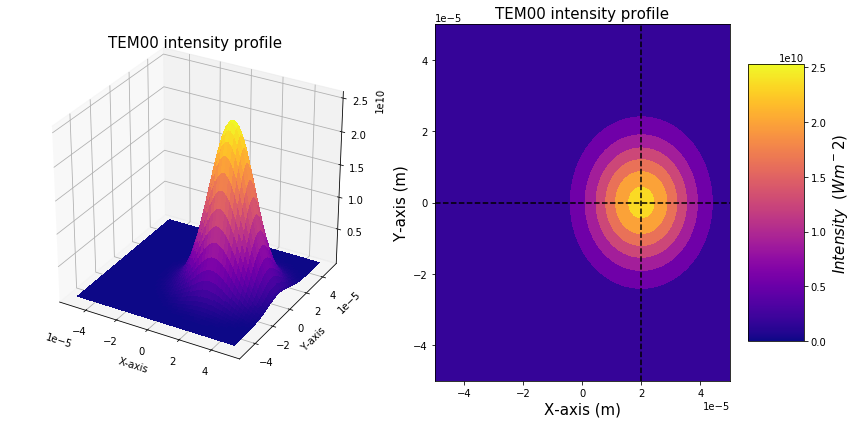

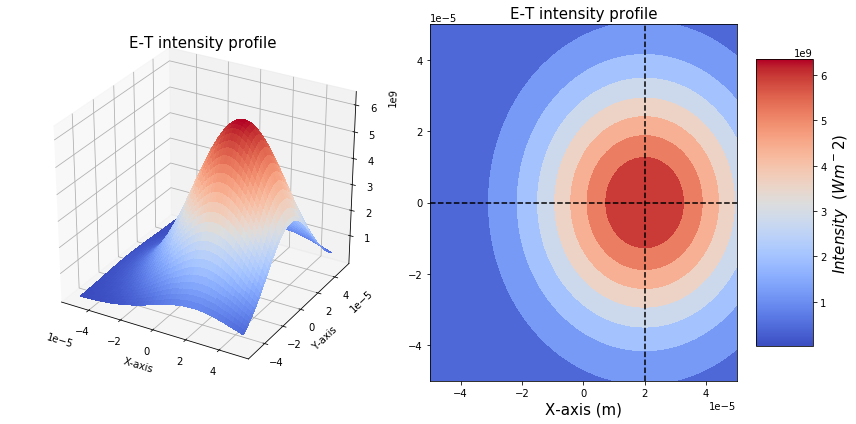

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
font=15

TEM_fig = pyplot.figure(figsize = (12,6))
ax = TEM_fig.add_subplot(1,2,1,projection='3d')
x2, y2 = numpy.meshgrid(x, y)
q1=flux(P,rb,x2,y2,xfocal,yfocal)
surf1 = ax.plot_surface(x2, y2, q1, cmap=cm.plasma,linewidth=0, antialiased=False)
pyplot.xlabel('X-axis'); pyplot.ylabel('Y-axis')
pyplot.title('TEM00 intensity profile',fontsize=font)
pyplot.ticklabel_format(axis='both', style='sci', scilimits=(-2,0))
pyplot.subplots_adjust(wspace = 0.5)

ax = TEM_fig.add_subplot(1,2,2)
pyplot.tick_params(labeltop=False, labelright=False,labelleft=True,labelbottom=True)
contours=pyplot.contourf(x2,y2,q1,cmap=cm.plasma)
pyplot.title('TEM00 intensity profile',fontsize=font)
pyplot.xlabel('X-axis (m)',fontsize=font); pyplot.ylabel('Y-axis (m)',fontsize=font)
pyplot.ticklabel_format(axis='both', style='sci', scilimits=(-2,0))
cbar_TEM = TEM_fig.colorbar(surf1, aspect=5)
cbar_TEM.set_label('$Intensity$  $(W m^-2)$',fontsize=font)
pyplot.axvline(x=xfocal,color='black', linestyle='--');
pyplot.axhline(y=yfocal,color='black', linestyle='--');
pyplot.tight_layout()


ET_fig = pyplot.figure(figsize = (12,6))
ax = ET_fig.add_subplot(1,2,1,projection='3d')
x2, y2 = numpy.meshgrid(x, y)
q2=flux2(P,rb,x2,y2,xfocal, yfocal)
surf2 = ax.plot_surface(x2, y2, q2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
pyplot.xlabel('X-axis') ; pyplot.ylabel('Y-axis')
pyplot.title('E-T intensity profile', fontsize=font)
pyplot.ticklabel_format(axis='both', style='sci', scilimits=(-2,0))

ax = ET_fig.add_subplot(1,2,2)
pyplot.subplots_adjust(wspace = 0.5)
pyplot.tick_params(labeltop=False, labelright=False,labelleft=True,labelbottom=True)
contours=pyplot.contourf(x2,y2,q2,cmap=cm.coolwarm)
pyplot.title('E-T intensity profile',fontsize=font)
pyplot.xlabel('X-axis (m)',fontsize=font)
pyplot.ticklabel_format(axis='both', style='sci', scilimits=(-2,0))
cbar_ET = ET_fig.colorbar(surf2, aspect=5)
cbar_ET.set_label('$Intensity$  $(W m^-2)$',fontsize=font)
pyplot.axvline(x=xfocal,color='black', linestyle='--');
pyplot.axhline(y=yfocal,color='black', linestyle='--');
pyplot.tight_layout()

In [4]:
numpy.max(q1)/numpy.max(q2)

3.9952972875739063